# SAE 15 - Traiter les données

### Synopsis

*Sujet : Vaccination contre la COVID 19* 

Cette SAE 15 est tourneé autour du traitement des données. Nous avons à notre disposition un **jeu de données** sur la campagne de vaccination contre la COVID 19 en France. 
Nous devons tout d'abord mettre nos fichier CSV dans un seul fichier CSV.
Nous allons par la suite **traiter les erreurs** présentes dans ce fichier (détection des valeurs manquantes et abérantes).
Enfin, nous allons créer un **graphique** montrant l'avancement de la campagne de vaccination contre la COVID 19 en fonction du temps, dans le département du Haut-Rhin.

### Écrire un programme qui fusionne les fichiers csv (*dossier src/data*)

Nous avons réalisé un code en .bat pour fusionner ces fichiers : 

```bash
copy *csv masterlist.csv
```

Nous exécutons ce code dans le répertoire où se trouve l'ensemble des fichiers CSV.


#### Importation des librairies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

#### Lecture du fichier CSV

Lecture du fichier masterlist.csv et affichage des informations sur la dimension de ce fichier.

In [2]:
df = pd.read_csv(r".\vaccination-covid\src\data\masterlist.csv", delimiter=";")
df

C:\Users\Louis\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date_reference,semaine_injection,region_residence,libelle_region,departement_residence,libelle_departement,population_insee,classe_age,libelle_classe_age,type_vaccin,...,taux_cumu_1_inj,taux_cumu_termine,date,effectif_rappel,effectif_cumu_rappel,effectif_rappel_parmi_eligible,effectif_eligible_au_rappel,taux_rappel,taux_cumu_rappel,taux_cumu_rappeleli
0,2022-01-09,2020-52,1,Guadeloupe,Tout département,FRANCE,50545.0,00-11,de 0 à 11 ans,COMIRNATY Pfizer-BioNTech,...,NaN,NaN,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-09,2020-52,1,Guadeloupe,Tout département,FRANCE,50545.0,00-11,de 0 à 11 ans,COVID-19 Vaccine Moderna,...,NaN,NaN,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-09,2020-52,1,Guadeloupe,Tout département,FRANCE,50545.0,00-11,de 0 à 11 ans,VAXZEVRIA AstraZeneca,...,NaN,NaN,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-09,2020-52,1,Guadeloupe,Tout département,FRANCE,50545.0,00-11,de 0 à 11 ans,COVID-19 Vaccine Janssen,...,NaN,NaN,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-09,2020-52,1,Guadeloupe,Tout département,FRANCE,50545.0,00-11,de 0 à 11 ans,COMIRNATY Pfizer-BioNTech pédiatrique,...,NaN,NaN,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368924,2022-01-16,2022-02,Toute région,FRANCE,Tout département,FRANCE,67287193.0,TOUT_AGE,Tout âge,VAXZEVRIA AstraZeneca,...,0.065,0.054,2022-01-16,NaN,NaN,NaN,4249640.0,NaN,NaN,NaN
368925,2022-01-16,2022-02,Toute région,FRANCE,Tout département,FRANCE,67287193.0,TOUT_AGE,Tout âge,COVID-19 Vaccine Janssen,...,0.016,0.016,2022-01-16,NaN,NaN,NaN,1043810.0,NaN,NaN,NaN
368926,2022-01-16,2022-02,Toute région,FRANCE,Tout département,FRANCE,67287193.0,TOUT_AGE,Tout âge,COMIRNATY Pfizer-BioNTech pédiatrique,...,0.002,0.000,2022-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368927,2022-01-16,2022-02,Toute région,FRANCE,Tout département,FRANCE,67287193.0,TOUT_AGE,Tout âge,Tout vaccin,...,0.796,0.777,2022-01-16,3225750.0,31617730.0,31160710.0,43673790.0,0.048,0.47,0.713


#### Affichage du nom des différentes colonnes

In [22]:
df.columns

Index(['date_reference', 'semaine_injection', 'region_residence',
       'libelle_region', 'departement_residence', 'libelle_departement',
       'population_insee', 'classe_age', 'libelle_classe_age', 'type_vaccin',
       'effectif_1_inj', 'effectif_termine', 'effectif_cumu_1_inj',
       'effectif_cumu_termine', 'taux_1_inj', 'taux_termine',
       'taux_cumu_1_inj', 'taux_cumu_termine', 'date', 'effectif_rappel',
       'effectif_cumu_rappel', 'effectif_rappel_parmi_eligible',
       'effectif_eligible_au_rappel', 'taux_rappel', 'taux_cumu_rappel',
       'taux_cumu_rappeleli'],
      dtype='object')

### Établir pour chaque variable le nombre de valeurs manquantes et aberrante ainsi que le pourcentage que cela représente.

#### Détermination des valeurs manquantes

In [20]:
x = pd.isnull(df["taux_cumu_rappeleli"]).sum().sum()
print(x)

352566


#### Détermination des valeurs abérantes

Nous réalisons dans un premier temps une boite à moustache pour les valeurs de type [int] et [double].

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


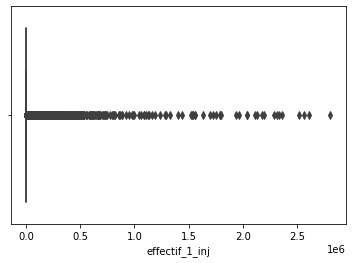

In [3]:
f, axes = plt.subplots()
sns.boxplot(df["effectif_termine"])
plt.show()

#### effectif_1_inj

effectif_1_inj[int] Effectif de patients ayant reçu au moins une première injection.

On observe qu'en traçant une boite à moustache, aucune boite n'est tracée, on obtient uniquement des points.
Celà signifie qu'aucune valeures abérante n'est présente.

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


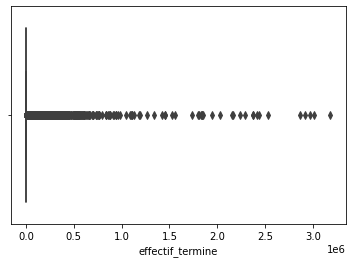

In [4]:
f, axes = plt.subplots()
sns.boxplot(df["effectif_termine"])
plt.show()

#### effectif_termine

effectif_termine[int] Effectif de patients dont le schéma vaccinal initial est terminé.

On observe qu'en traçant une boite à moustache, aucune boite n'est tracée, on obtient uniquement des points.
Celà signifie qu'aucune valeures abérante n'est présente.

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


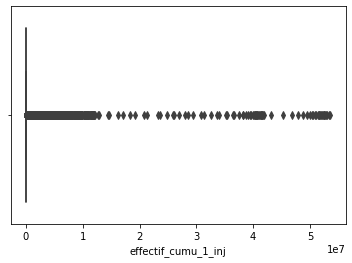

In [5]:
f, axes = plt.subplots()
sns.boxplot(df["effectif_cumu_1_inj"])
plt.show()

#### effectif_cumu_1_inj

effectif_cumu_1_inj[int] Effectif cumulé de patients ayant reçu au moins une première injection.
On observe qu'en traçant une boite à moustache, aucune boite n'est tracée, on obtient uniquement des points.
Celà signifie qu'aucune valeures abérante n'est présente.

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


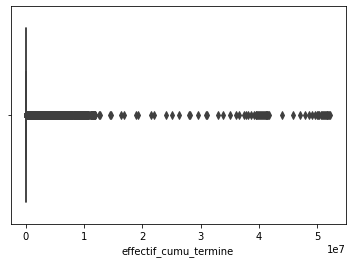

In [6]:
f, axes = plt.subplots()
sns.boxplot(df["effectif_cumu_termine"])
plt.show()

#### effectif_cumu_termine

effectif_cumu_termine[int] Effectif cumulé de patients dont le schéma vaccinal initial est terminé.
On observe qu'en traçant une boite à moustache, aucune boite n'est tracée, on obtient uniquement des points.
Celà signifie qu'aucune valeures abérante n'est présente.

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


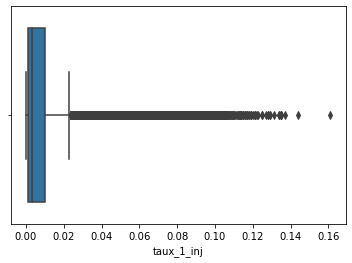

In [7]:
f, axes = plt.subplots()
sns.boxplot(df["taux_1_inj"])
plt.show()

#### taux_1_inj 

taux_1_inj[double] Taux de vaccination de patients ayant reçu au moins une première injection.
On observe, en traçant une boite à moustache, qu'une boite est tracée. On observe également des points en dehors des moustaches de la boite, plus particulièrement du côté droit; ce sont nos valeurs abérantes.

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


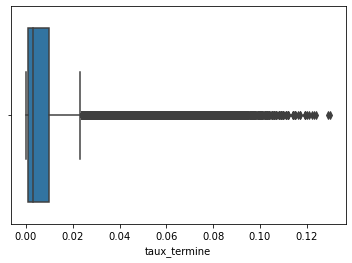

In [8]:
f, axes = plt.subplots()
sns.boxplot(df["taux_termine"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


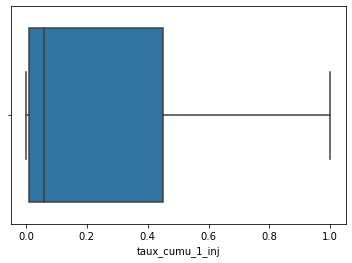

In [9]:
f, axes = plt.subplots()
sns.boxplot(df["taux_cumu_1_inj"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


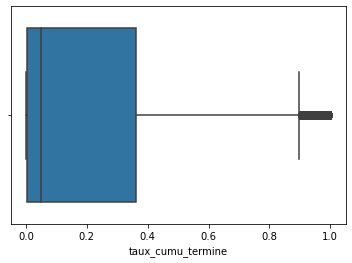

In [10]:
f, axes = plt.subplots()
sns.boxplot(df["taux_cumu_termine"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


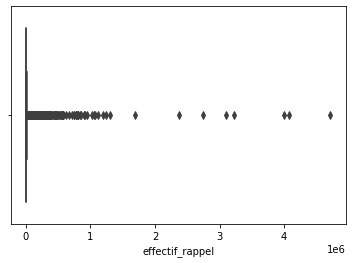

In [12]:
f, axes = plt.subplots()
sns.boxplot(df["effectif_rappel"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


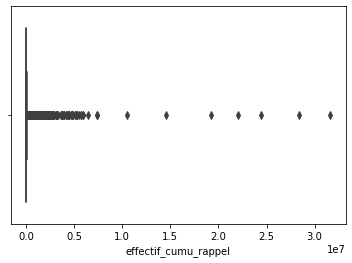

In [13]:
f, axes = plt.subplots()
sns.boxplot(df["effectif_cumu_rappel"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


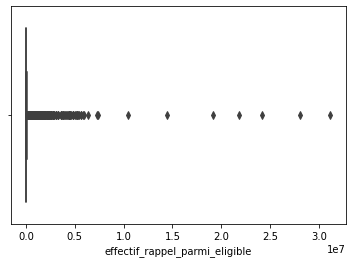

In [14]:
f, axes = plt.subplots()
sns.boxplot(df["effectif_rappel_parmi_eligible"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


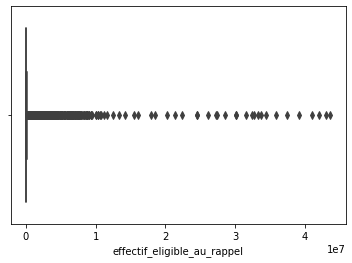

In [15]:
f, axes = plt.subplots()
sns.boxplot(df["effectif_eligible_au_rappel"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


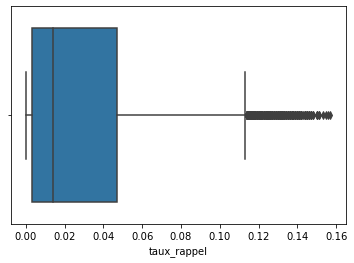

In [17]:
f, axes = plt.subplots()
sns.boxplot(df["taux_rappel"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


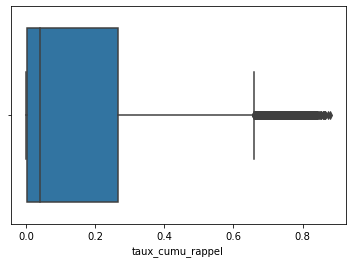

In [18]:
f, axes = plt.subplots()
sns.boxplot(df["taux_cumu_rappel"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


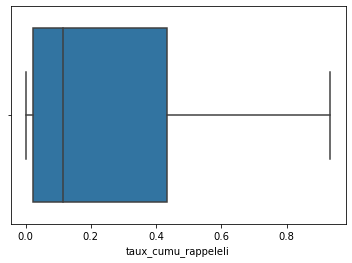

In [19]:
f, axes = plt.subplots()
sns.boxplot(df["taux_cumu_rappeleli"])
plt.show()

##### Détermination de la médiane 

In [21]:
y = df.median(axis = 0)
print(y)

population_insee                  77802.500
effectif_1_inj                      310.000
effectif_termine                    310.000
effectif_cumu_1_inj                6420.000
effectif_cumu_termine              4880.000
taux_1_inj                            0.003
taux_termine                          0.003
taux_cumu_1_inj                       0.059
taux_cumu_termine                     0.048
effectif_rappel                    1380.000
effectif_cumu_rappel               4190.000
effectif_rappel_parmi_eligible     6320.000
effectif_eligible_au_rappel        7540.000
taux_rappel                           0.014
taux_cumu_rappel                      0.040
taux_cumu_rappeleli                   0.116
dtype: float64


C:\Users\Louis\AppData\Local\Temp\ipykernel_122020\2986268782.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  y = df.median(axis = 0)
